In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('data1_reg_ass2.xlsx')
df

,Area,Bedrooms,Age,Price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


#### Residual analysis for simple regression between price and area 

In [3]:
# Add a constant to the DataFrame for the regression intercept
df = sm.add_constant(df)

# Perform the regression
model = sm.OLS(df['Price'], df[['const', 'Area']])
results = model.fit()

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     17.35
Date:                Thu, 14 Mar 2024   Prob (F-statistic):             0.0141
Time:                        01:38:20   Log-Likelihood:                -72.543
No. Observations:                   6   AIC:                             149.1
Df Residuals:                       4   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.669e+04   1.39e+05      0.552      0.6

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### CONCLUSION
#### Price = 7.669 + 167.3095(Area)



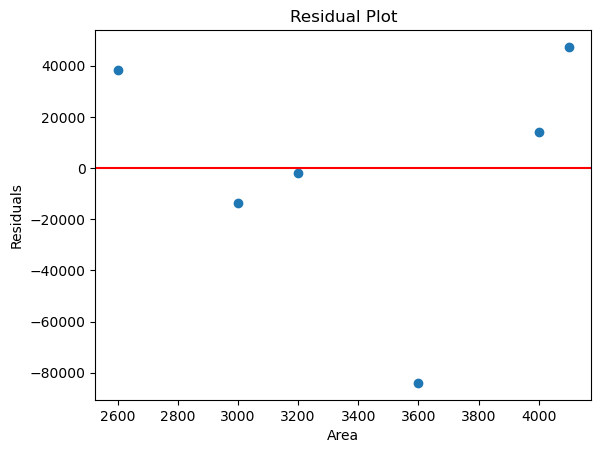

In [4]:
# Calculate the residuals
df['Residuals'] = results.resid

# Plot the residuals
plt.scatter(df['Area'], df['Residuals'])
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Area')
plt.ylabel('Residuals')
plt.show()

#### Residual analysis for multiple regression between price and rest of the variables. 

In [9]:
# Fit the multiple linear regression model
model = sm.OLS(df['Price'], df[['const', 'Area', 'Bedrooms', 'Age']]).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     13.65
Date:                Thu, 14 Mar 2024   Prob (F-statistic):             0.0690
Time:                        01:45:43   Log-Likelihood:                -68.367
No. Observations:                   6   AIC:                             144.7
Df Residuals:                       2   BIC:                             143.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.565e+05   1.53e+05      1.674      0.2

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### CONCLUSION
#### Price = 2.565 + 119.6791(Area) + 1.31(Bedrooms) - 4207.2876(Age)



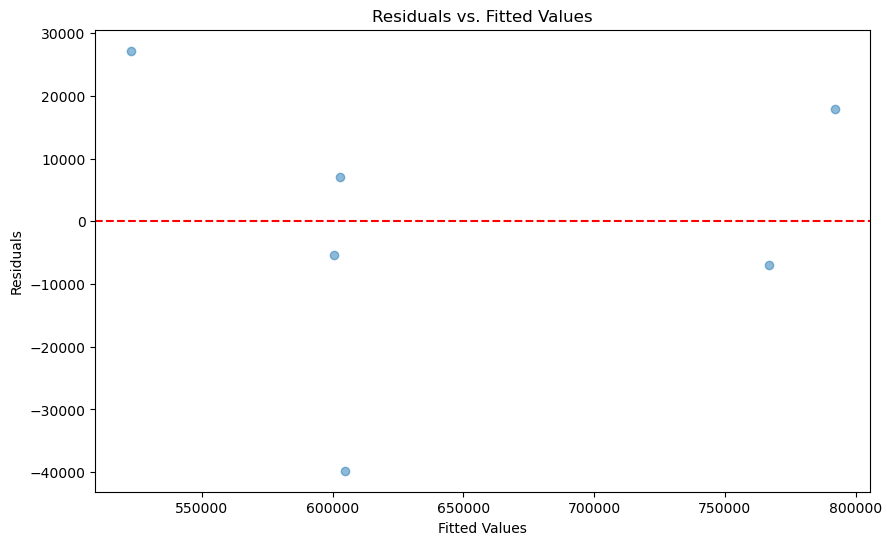

In [10]:
# Obtain the residuals
residuals = model.resid

# Residuals vs. Fitted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

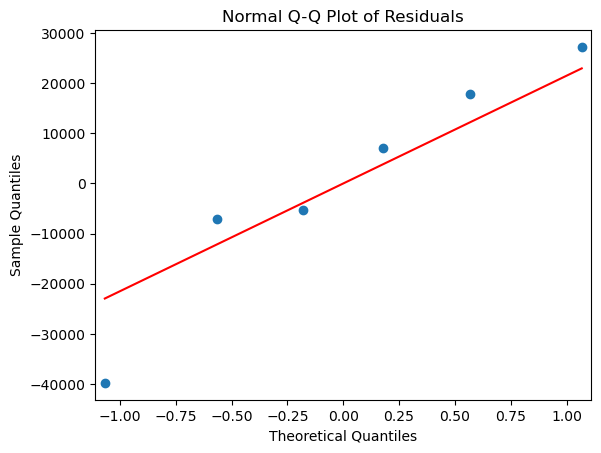

In [11]:
# Normal Q-Q Plot of Residuals
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

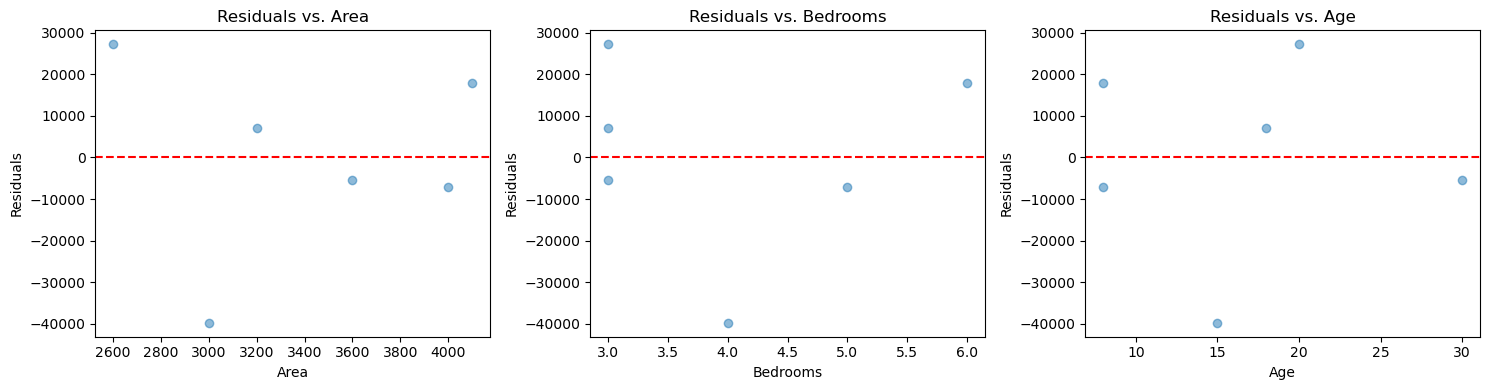

In [13]:
# Residuals vs. Each Predictor Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, predictor in enumerate(['Area', 'Bedrooms', 'Age']):
    ax = axes[i]
    ax.scatter(df[predictor], residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f'Residuals vs. {predictor}')
    ax.set_xlabel(predictor)
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [7]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_data_attr',
 '_df_model',
 '_df_resid',
 '_fit_collinear',
 '_fit_ridge',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_init_kwds',
 '_handle_data',
 '_init_keys',
 '_kwargs_allowed',
 '_setup_score_hess',
 '_sqrt_lasso',
 'data',
 'df_model',
 'df_resid',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'fit_regularized',
 'from_formula',
 'get_distribution',
 'hessian',
 'hessian_factor',
 'information',
 'initialize',
 'k_constant',
 'loglike',
 'nobs',
 'normalized_cov_params',
 'pinv_wexog',
 'predict',
 'rank',
 'score',
 'weights',
 'wendog',
 'wexog',
 'wexog_singular_